# Week 2: Statistics & Probability for Quantitative Finance

## 🎯 Learning Objectives

By the end of this week, you will understand:
1. **Probability distributions** relevant to finance (Normal, Log-Normal, Student-t)
2. **Moments of distributions** (mean, variance, skewness, kurtosis)
3. **Hypothesis testing** for trading strategies
4. **Correlation and dependence** structures
5. **Regression fundamentals** (OLS, interpretation)
6. Why financial returns are **NOT normally distributed**

---

## Why Statistics Matter in Quant Finance?

| Application | Statistical Concept |
|-------------|--------------------|
| Risk Modeling | Distribution tails, VaR, CVaR |
| Strategy Evaluation | Hypothesis testing, p-values |
| Portfolio Optimization | Correlation, covariance matrices |
| Factor Models | Regression, beta estimation |
| Market Regime Detection | Hidden Markov Models, clustering |

> "Statistics is the grammar of science." - Karl Pearson

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, t, lognorm, skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# Constants
TRADING_DAYS = 252

print("✅ Libraries loaded successfully!")
print(f"📚 Week 2: Statistics & Probability")
print(f"🔧 SciPy version: {stats.__name__}")

✅ Libraries loaded successfully!
📚 Week 2: Statistics & Probability
🔧 SciPy version: scipy.stats


---

# Part 1: Probability Distributions in Finance

## The Normal Distribution

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Where:
- $\mu$ = mean (expected value)
- $\sigma$ = standard deviation

### Properties:
- 68% within 1σ, 95% within 2σ, 99.7% within 3σ
- Symmetric around the mean
- Skewness = 0, Excess Kurtosis = 0

NORMAL DISTRIBUTION


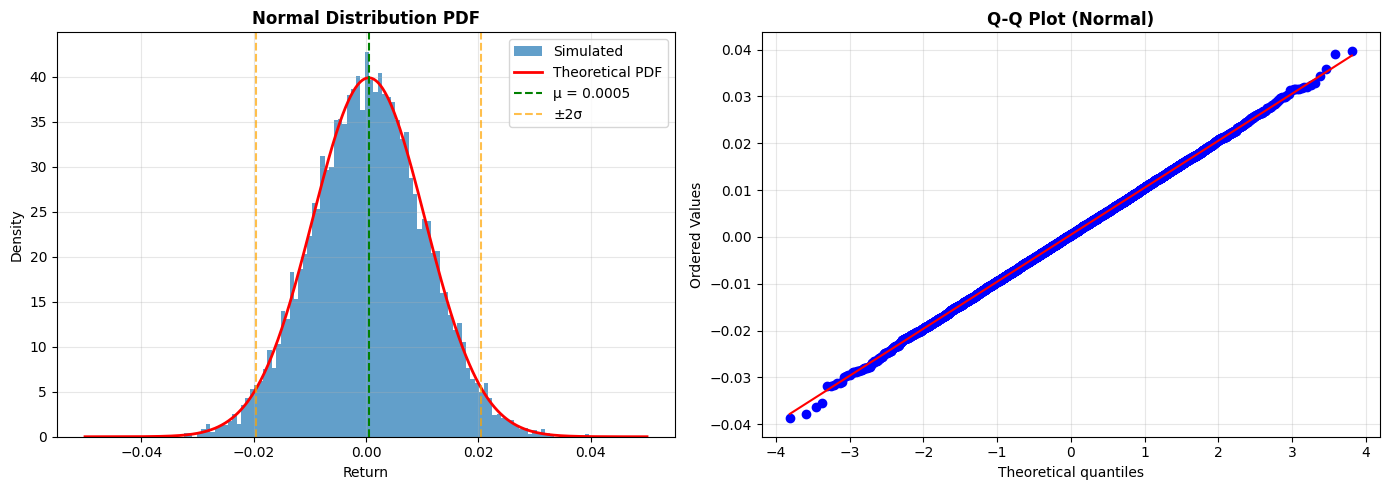


📊 Sample Statistics:
   Mean:     0.000479 (expected: 0.0005)
   Std:      0.010034 (expected: 0.01)
   Skewness: 0.0020 (expected: 0)
   Kurtosis: 0.0265 (expected: 0)


In [2]:
# Normal distribution
print("NORMAL DISTRIBUTION")
print("="*60)

# Parameters
mu = 0.0005  # Daily expected return (about 12.5% annual)
sigma = 0.01  # Daily volatility (about 16% annual)

# Generate samples
normal_returns = np.random.normal(mu, sigma, 10000)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(normal_returns, bins=100, density=True, alpha=0.7, label='Simulated')
x = np.linspace(-0.05, 0.05, 1000)
axes[0].plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Theoretical PDF')
axes[0].axvline(x=mu, color='green', linestyle='--', label=f'μ = {mu}')
axes[0].axvline(x=mu-2*sigma, color='orange', linestyle='--', alpha=0.7)
axes[0].axvline(x=mu+2*sigma, color='orange', linestyle='--', alpha=0.7, label='±2σ')
axes[0].set_xlabel('Return')
axes[0].set_ylabel('Density')
axes[0].set_title('Normal Distribution PDF', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# QQ plot
stats.probplot(normal_returns, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normal)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Sample Statistics:")
print(f"   Mean:     {np.mean(normal_returns):.6f} (expected: {mu})")
print(f"   Std:      {np.std(normal_returns):.6f} (expected: {sigma})")
print(f"   Skewness: {skew(normal_returns):.4f} (expected: 0)")
print(f"   Kurtosis: {kurtosis(normal_returns):.4f} (expected: 0)")

### 📊 OUTPUT EXPLANATION:

- **Histogram**: Shows actual distribution vs theoretical curve
- **Q-Q Plot**: If data is normal, points lie on the diagonal line
- **Skewness ≈ 0**: Symmetric distribution
- **Kurtosis ≈ 0**: No heavy tails (excess kurtosis = kurtosis - 3)

---

## The Student-t Distribution (Fat Tails)

$$f(x) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})}\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$

Where $\nu$ = degrees of freedom

### Why Student-t for Finance?
- **Fat tails**: More extreme events than Normal predicts
- As $\nu \to \infty$, approaches Normal distribution
- Equity returns typically fit with $\nu \approx 4-6$

STUDENT-T DISTRIBUTION: FAT TAILS


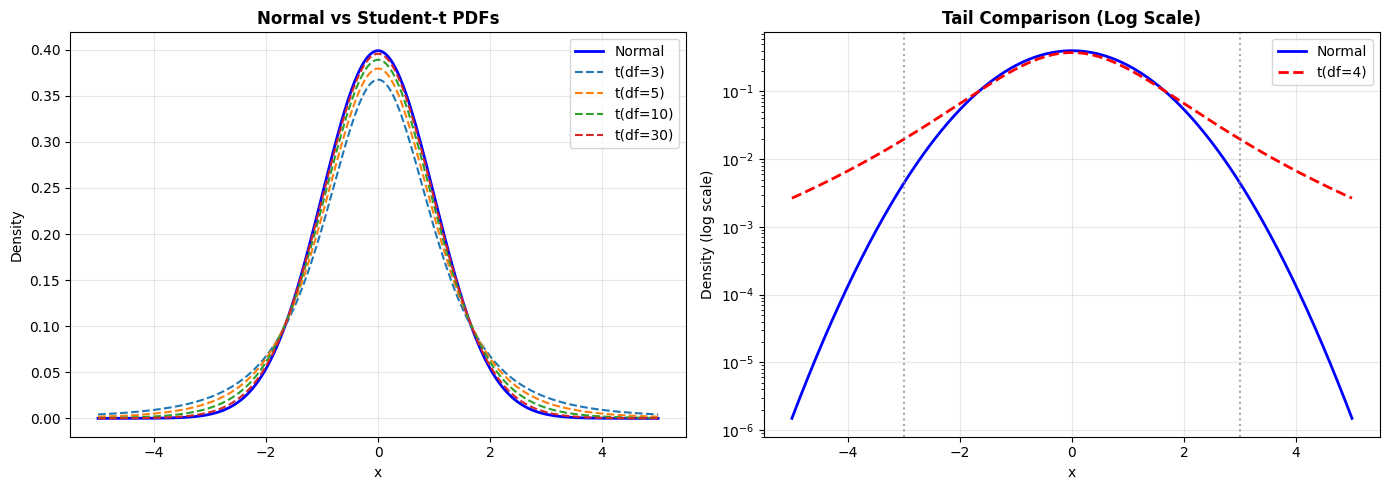


📊 Probability of |X| > 3 (extreme events):
   Normal:    0.002700 (0.2700%)
   t(df=4):   0.039942 (3.9942%)
   Ratio:     14.8x more likely!

⚠️  In 1000 trading days:
   Normal predicts 2.7 days with |return| > 3σ
   Student-t(4) predicts 39.9 days


In [3]:
# Student-t distribution comparison
print("STUDENT-T DISTRIBUTION: FAT TAILS")
print("="*60)

# Different degrees of freedom
x = np.linspace(-5, 5, 1000)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDFs
axes[0].plot(x, norm.pdf(x), 'b-', linewidth=2, label='Normal')
for df in [3, 5, 10, 30]:
    axes[0].plot(x, t.pdf(x, df), '--', linewidth=1.5, label=f't(df={df})')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Density')
axes[0].set_title('Normal vs Student-t PDFs', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Log scale to see tails better
axes[1].semilogy(x, norm.pdf(x), 'b-', linewidth=2, label='Normal')
axes[1].semilogy(x, t.pdf(x, 4), 'r--', linewidth=2, label='t(df=4)')
axes[1].axvline(x=-3, color='gray', linestyle=':', alpha=0.7)
axes[1].axvline(x=3, color='gray', linestyle=':', alpha=0.7)
axes[1].set_xlabel('x')
axes[1].set_ylabel('Density (log scale)')
axes[1].set_title('Tail Comparison (Log Scale)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate tail probabilities
print("\n📊 Probability of |X| > 3 (extreme events):")
print(f"   Normal:    {2 * norm.sf(3):.6f} ({2 * norm.sf(3) * 100:.4f}%)")
print(f"   t(df=4):   {2 * t.sf(3, 4):.6f} ({2 * t.sf(3, 4) * 100:.4f}%)")
print(f"   Ratio:     {t.sf(3, 4) / norm.sf(3):.1f}x more likely!")

print("\n⚠️  In 1000 trading days:")
print(f"   Normal predicts {2 * norm.sf(3) * 1000:.1f} days with |return| > 3σ")
print(f"   Student-t(4) predicts {2 * t.sf(3, 4) * 1000:.1f} days")

### 📊 OUTPUT EXPLANATION:

- **Fat tails** = Higher probability of extreme events
- The log-scale plot shows tails are **orders of magnitude** higher
- Using Normal distribution **underestimates** crash risk!
- This is why VaR models failed in 2008

---

## The Log-Normal Distribution

If $X \sim N(\mu, \sigma^2)$, then $Y = e^X \sim \text{Log-Normal}$

### Why Log-Normal for Prices?
- Prices cannot be negative
- Multiplicative process: $P_t = P_0 \times e^{r_1} \times e^{r_2} \times ...$
- Central assumption in Black-Scholes options pricing

LOG-NORMAL DISTRIBUTION


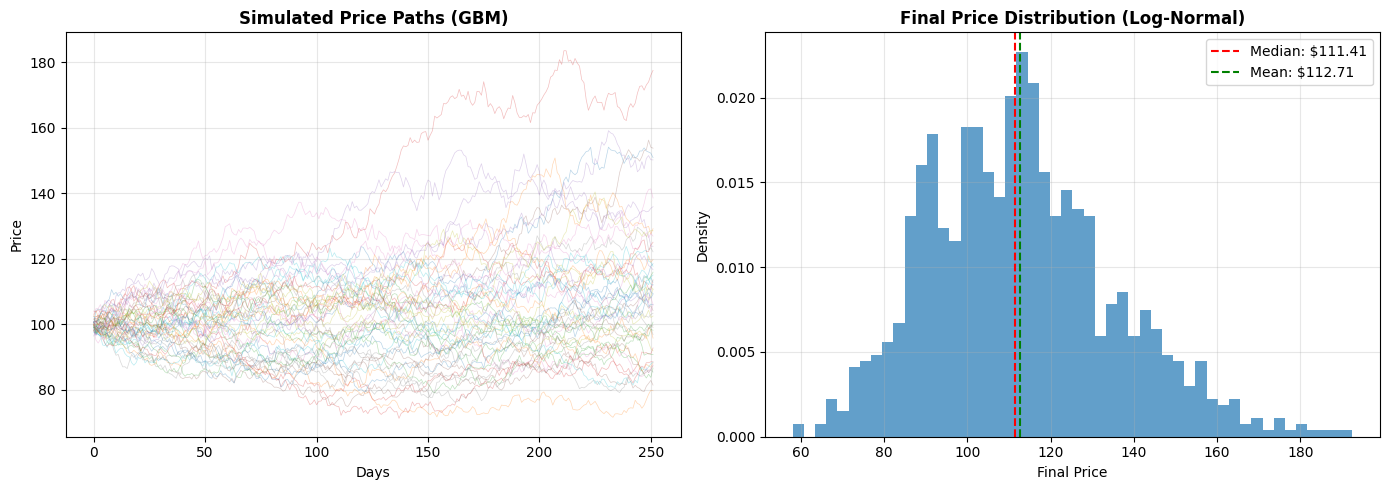


📊 Final Price Statistics:
   Mean:   $112.71
   Median: $111.41
   Std:    $22.27
   Min:    $58.09
   Max:    $192.39

💡 Mean > Median indicates positive skew (log-normal)!


In [4]:
# Log-Normal distribution for prices
print("LOG-NORMAL DISTRIBUTION")
print("="*60)

# Simulate price paths
np.random.seed(42)
n_paths = 1000
n_days = 252

# Log returns (normal)
mu_log = 0.10 / 252  # 10% annual drift
sigma_log = 0.20 / np.sqrt(252)  # 20% annual vol

log_returns = np.random.normal(mu_log, sigma_log, (n_paths, n_days))

# Prices (log-normal)
prices = 100 * np.exp(np.cumsum(log_returns, axis=1))

# Final prices are log-normally distributed
final_prices = prices[:, -1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price paths
for i in range(min(50, n_paths)):
    axes[0].plot(prices[i], alpha=0.3, linewidth=0.5)
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Price')
axes[0].set_title('Simulated Price Paths (GBM)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Final price distribution
axes[1].hist(final_prices, bins=50, density=True, alpha=0.7)
axes[1].axvline(x=np.median(final_prices), color='r', linestyle='--', 
               label=f'Median: ${np.median(final_prices):.2f}')
axes[1].axvline(x=np.mean(final_prices), color='g', linestyle='--', 
               label=f'Mean: ${np.mean(final_prices):.2f}')
axes[1].set_xlabel('Final Price')
axes[1].set_ylabel('Density')
axes[1].set_title('Final Price Distribution (Log-Normal)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Final Price Statistics:")
print(f"   Mean:   ${np.mean(final_prices):.2f}")
print(f"   Median: ${np.median(final_prices):.2f}")
print(f"   Std:    ${np.std(final_prices):.2f}")
print(f"   Min:    ${np.min(final_prices):.2f}")
print(f"   Max:    ${np.max(final_prices):.2f}")
print("\n💡 Mean > Median indicates positive skew (log-normal)!")

---

# Part 2: Moments of Distributions

## The Four Moments

| Moment | Name | Formula | Interpretation |
|--------|------|---------|----------------|
| 1st | **Mean** | $\mu = E[X]$ | Expected return |
| 2nd | **Variance** | $\sigma^2 = E[(X-\mu)^2]$ | Risk/Dispersion |
| 3rd | **Skewness** | $\gamma_1 = E[(X-\mu)^3]/\sigma^3$ | Asymmetry |
| 4th | **Kurtosis** | $\gamma_2 = E[(X-\mu)^4]/\sigma^4 - 3$ | Tail heaviness |

THE FOUR MOMENTS


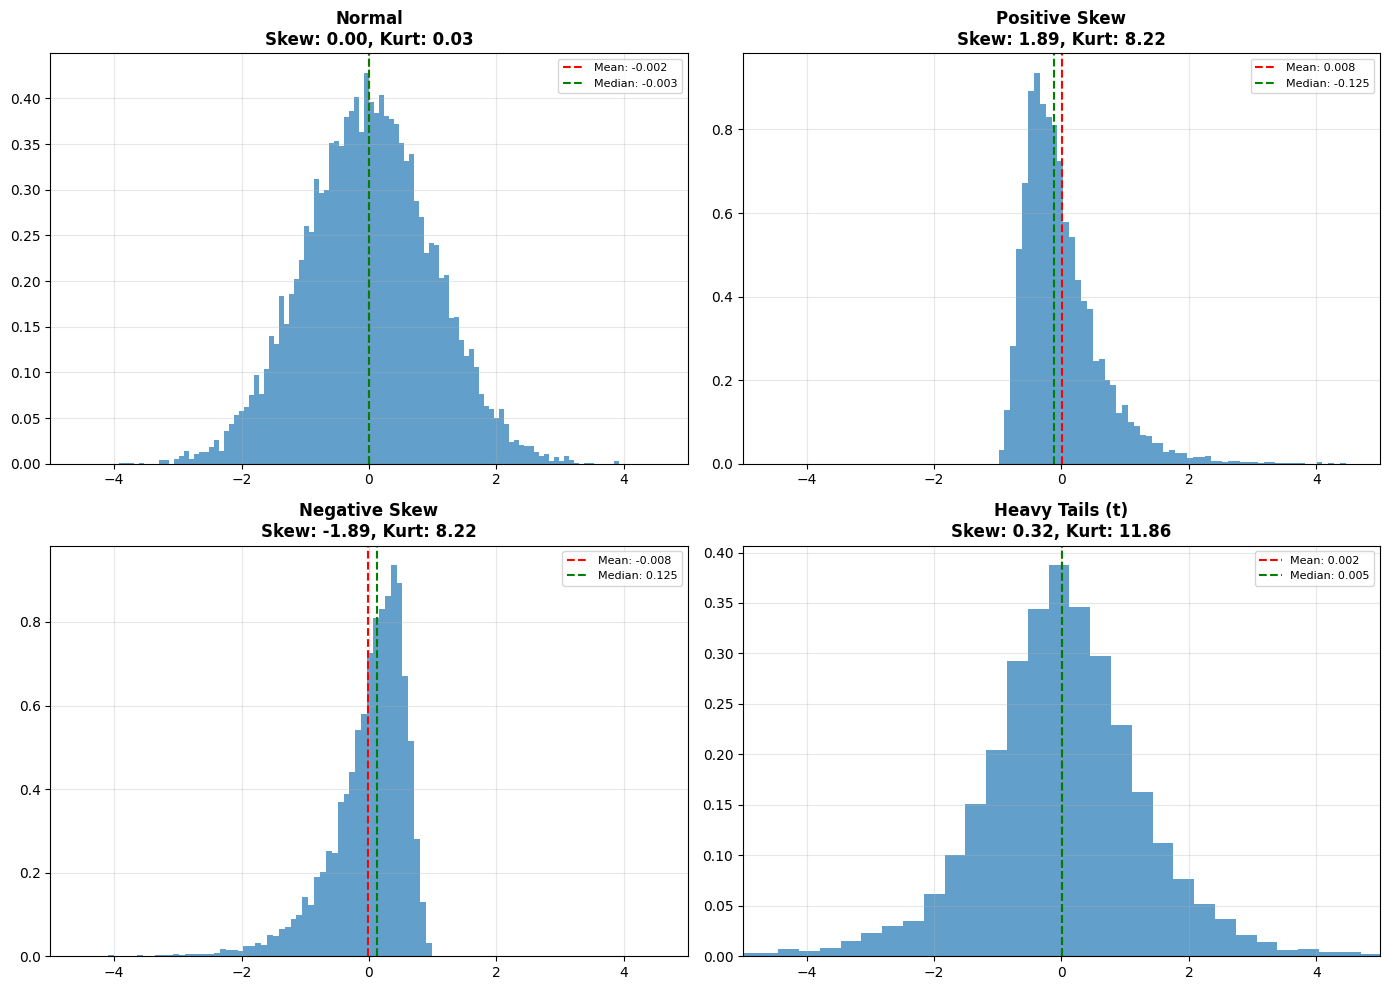


📊 MOMENTS COMPARISON:
Distribution               Mean        Std       Skew       Kurt
-----------------------------------------------------------------
Normal                  -0.0021     1.0034     0.0020     0.0265
Positive Skew            0.0080     0.6113     1.8936     8.2213
Negative Skew           -0.0080     0.6113    -1.8936     8.2213
Heavy Tails (t)          0.0025     1.4127     0.3180    11.8574


In [5]:
# Four moments demonstration
print("THE FOUR MOMENTS")
print("="*60)

# Generate different distributions
np.random.seed(42)
n = 10000

# Normal (baseline)
normal = np.random.normal(0, 1, n)

# Positive skew (like stock prices)
pos_skew = np.random.lognormal(0, 0.5, n) - np.exp(0.5**2/2)

# Negative skew (like stock returns)
neg_skew = -pos_skew

# Heavy tails (like market crashes)
heavy_tails = np.random.standard_t(4, n)

distributions = {
    'Normal': normal,
    'Positive Skew': pos_skew,
    'Negative Skew': neg_skew,
    'Heavy Tails (t)': heavy_tails
}

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (name, data) in enumerate(distributions.items()):
    axes[i].hist(data, bins=100, density=True, alpha=0.7)
    axes[i].axvline(x=np.mean(data), color='r', linestyle='--', label=f'Mean: {np.mean(data):.3f}')
    axes[i].axvline(x=np.median(data), color='g', linestyle='--', label=f'Median: {np.median(data):.3f}')
    axes[i].set_title(f'{name}\nSkew: {skew(data):.2f}, Kurt: {kurtosis(data):.2f}', fontweight='bold')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(-5, 5)

plt.tight_layout()
plt.show()

# Summary table
print("\n📊 MOMENTS COMPARISON:")
print(f"{'Distribution':<20} {'Mean':>10} {'Std':>10} {'Skew':>10} {'Kurt':>10}")
print("-"*65)
for name, data in distributions.items():
    print(f"{name:<20} {np.mean(data):>10.4f} {np.std(data):>10.4f} {skew(data):>10.4f} {kurtosis(data):>10.4f}")

### 📊 OUTPUT EXPLANATION:

| Skewness | Interpretation | Example |
|----------|----------------|--------|
| Skew < 0 | More extreme losses | Stock returns |
| Skew = 0 | Symmetric | Normal dist |
| Skew > 0 | More extreme gains | Stock prices |

| Kurtosis | Interpretation | Example |
|----------|----------------|--------|
| Kurt > 0 | Fat tails | Financial returns |
| Kurt = 0 | Normal tails | Gaussian |
| Kurt < 0 | Thin tails | Uniform dist |

---

REAL FINANCIAL RETURNS: NON-NORMALITY


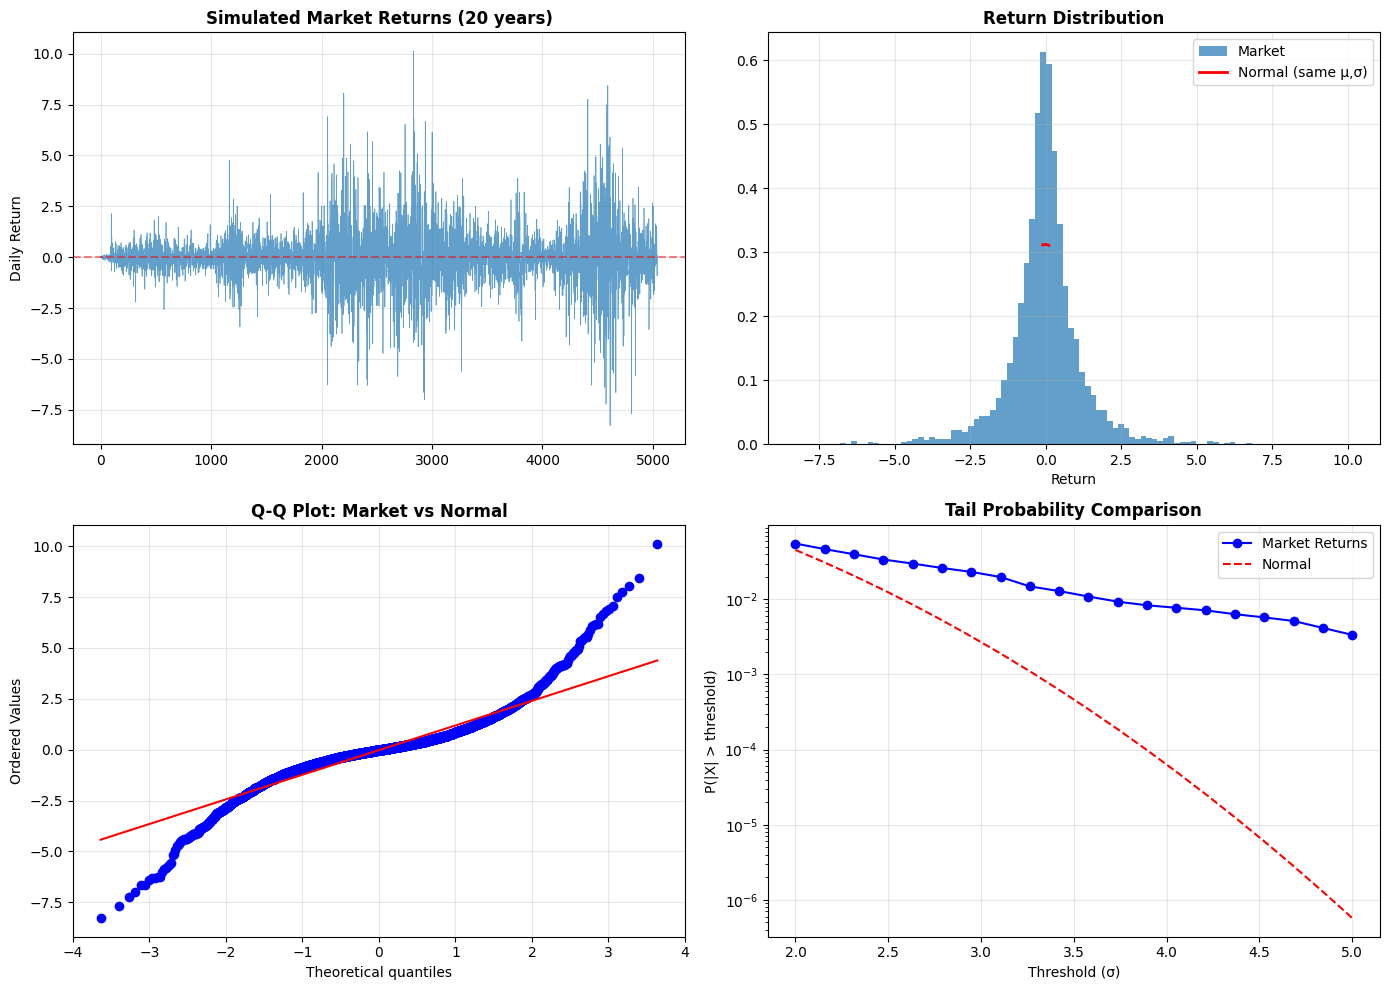


📊 MARKET RETURN STATISTICS:
   Skewness: 0.1834 (Normal = 0)
   Kurtosis: 6.9850 (Normal = 0)

⚠️  Real markets have:
   • Negative skew (more crashes than rallies)
   • Excess kurtosis (more extreme events)


In [6]:
# Real financial data characteristics
print("REAL FINANCIAL RETURNS: NON-NORMALITY")
print("="*60)

# Simulate realistic market returns
np.random.seed(42)
n_years = 20
n_days = n_years * 252

# Add volatility clustering and fat tails
# (Simplified GARCH-like process)
market_returns = []
vol = 0.01

for i in range(n_days):
    # Volatility clustering
    if i > 0:
        vol = 0.95 * vol + 0.05 * abs(market_returns[-1]) + 0.002
    
    # Fat-tailed innovation
    innovation = np.random.standard_t(5)
    ret = 0.0003 + vol * innovation
    market_returns.append(ret)

market_returns = np.array(market_returns)

# Compare to normal
normal_sim = np.random.normal(market_returns.mean(), market_returns.std(), n_days)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Return time series
axes[0, 0].plot(market_returns, alpha=0.7, linewidth=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0, 0].set_title('Simulated Market Returns (20 years)', fontweight='bold')
axes[0, 0].set_ylabel('Daily Return')
axes[0, 0].grid(True, alpha=0.3)

# Histogram comparison
axes[0, 1].hist(market_returns, bins=100, density=True, alpha=0.7, label='Market')
x = np.linspace(-0.1, 0.1, 1000)
axes[0, 1].plot(x, norm.pdf(x, market_returns.mean(), market_returns.std()), 
               'r-', linewidth=2, label='Normal (same μ,σ)')
axes[0, 1].set_title('Return Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Return')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(market_returns, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Market vs Normal', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Extreme events comparison
thresholds = np.linspace(2, 5, 20)
market_exceedance = [np.mean(np.abs(market_returns) > t * market_returns.std()) for t in thresholds]
normal_exceedance = [2 * norm.sf(t) for t in thresholds]

axes[1, 1].semilogy(thresholds, market_exceedance, 'b-o', label='Market Returns')
axes[1, 1].semilogy(thresholds, normal_exceedance, 'r--', label='Normal')
axes[1, 1].set_xlabel('Threshold (σ)')
axes[1, 1].set_ylabel('P(|X| > threshold)')
axes[1, 1].set_title('Tail Probability Comparison', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 MARKET RETURN STATISTICS:")
print(f"   Skewness: {skew(market_returns):.4f} (Normal = 0)")
print(f"   Kurtosis: {kurtosis(market_returns):.4f} (Normal = 0)")
print(f"\n⚠️  Real markets have:")
print(f"   • Negative skew (more crashes than rallies)")
print(f"   • Excess kurtosis (more extreme events)")

---

# Part 3: Hypothesis Testing for Trading

## The Framework

1. **Null Hypothesis ($H_0$)**: Strategy has zero alpha (no skill)
2. **Alternative ($H_1$)**: Strategy has positive alpha
3. **Test Statistic**: $t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$
4. **P-value**: Probability of seeing this result if $H_0$ is true

In [7]:
# Hypothesis testing for strategy returns
print("HYPOTHESIS TESTING: IS THE STRATEGY PROFITABLE?")
print("="*60)

# Simulate strategy returns
np.random.seed(42)
n_days = 252 * 2  # 2 years

# Strategy with small edge
true_alpha = 0.05 / 252  # 5% annual alpha
strategy_returns = np.random.normal(true_alpha, 0.01, n_days)

# Test: Is mean return significantly different from 0?
t_stat, p_value = stats.ttest_1samp(strategy_returns, 0)

# Calculate statistics
mean_ret = np.mean(strategy_returns)
std_ret = np.std(strategy_returns, ddof=1)
se = std_ret / np.sqrt(n_days)

# Annualize
annual_return = mean_ret * 252
annual_vol = std_ret * np.sqrt(252)
sharpe = annual_return / annual_vol

print(f"Strategy Statistics ({n_days} days):")
print(f"   Daily mean return: {mean_ret:.6f}")
print(f"   Daily std dev:     {std_ret:.6f}")
print(f"   Standard error:    {se:.6f}")
print(f"\n   Annualized return: {annual_return:.2%}")
print(f"   Annualized vol:    {annual_vol:.2%}")
print(f"   Sharpe ratio:      {sharpe:.2f}")

print(f"\nHypothesis Test (H0: μ = 0):")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value:     {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\n✅ REJECT H0 at α={alpha}: Strategy appears profitable!")
else:
    print(f"\n❌ FAIL TO REJECT H0 at α={alpha}: Not enough evidence of profitability")

HYPOTHESIS TESTING: IS THE STRATEGY PROFITABLE?
Strategy Statistics (504 days):
   Daily mean return: 0.000306
   Daily std dev:     0.009842
   Standard error:    0.000438

   Annualized return: 7.71%
   Annualized vol:    15.62%
   Sharpe ratio:      0.49

Hypothesis Test (H0: μ = 0):
   t-statistic: 0.6979
   p-value:     0.485588

❌ FAIL TO REJECT H0 at α=0.05: Not enough evidence of profitability


⚠️  MULTIPLE TESTING PROBLEM
Tested 100 strategies with ZERO true alpha

Significant at p < 0.05: 4 strategies
Significant at p < 0.01: 1 strategies

⚠️  PROBLEM: We found 4 'significant' strategies by PURE CHANCE!

📊 BONFERRONI CORRECTION:
   Adjusted α = 0.05 / 100 = 0.000500
   Significant after correction: 0 strategies


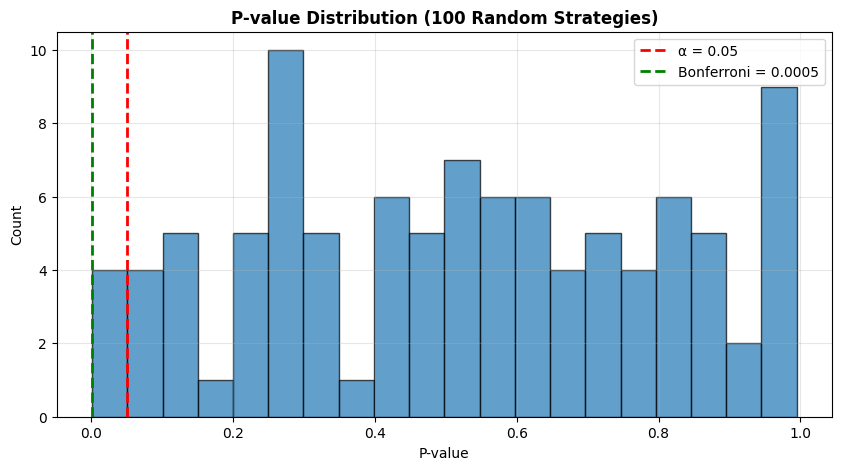

In [8]:
# Multiple testing problem
print("⚠️  MULTIPLE TESTING PROBLEM")
print("="*60)

# Simulate running 100 strategies (all with zero alpha!)
np.random.seed(42)
n_strategies = 100
n_days = 252

p_values = []
for _ in range(n_strategies):
    # Strategy with NO TRUE ALPHA
    returns = np.random.normal(0, 0.01, n_days)
    _, p = stats.ttest_1samp(returns, 0)
    p_values.append(p)

p_values = np.array(p_values)
significant_005 = np.sum(p_values < 0.05)
significant_001 = np.sum(p_values < 0.01)

print(f"Tested {n_strategies} strategies with ZERO true alpha")
print(f"\nSignificant at p < 0.05: {significant_005} strategies")
print(f"Significant at p < 0.01: {significant_001} strategies")

print(f"\n⚠️  PROBLEM: We found {significant_005} 'significant' strategies by PURE CHANCE!")

# Bonferroni correction
bonferroni_alpha = 0.05 / n_strategies
significant_bonf = np.sum(p_values < bonferroni_alpha)

print(f"\n📊 BONFERRONI CORRECTION:")
print(f"   Adjusted α = 0.05 / {n_strategies} = {bonferroni_alpha:.6f}")
print(f"   Significant after correction: {significant_bonf} strategies")

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(p_values, bins=20, edgecolor='black', alpha=0.7)
ax.axvline(x=0.05, color='r', linestyle='--', linewidth=2, label='α = 0.05')
ax.axvline(x=bonferroni_alpha, color='g', linestyle='--', linewidth=2, label=f'Bonferroni = {bonferroni_alpha:.4f}')
ax.set_xlabel('P-value')
ax.set_ylabel('Count')
ax.set_title('P-value Distribution (100 Random Strategies)', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

### 📊 OUTPUT EXPLANATION:

**The Multiple Testing Problem:**
- At α = 0.05, we expect 5% false positives by chance
- Running 100 tests → ~5 "significant" results with NO actual alpha!
- This is why backtesting many strategies leads to false discoveries

**Solutions:**
1. **Bonferroni correction**: α_adj = α / n_tests
2. **False Discovery Rate (FDR)**: Control expected false positive rate
3. **Out-of-sample testing**: Validate on held-out data

---

# Part 4: Correlation and Dependence

## Pearson Correlation
$$\rho_{XY} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X \sigma_Y}$$

## Spearman Rank Correlation
$$\rho_s = 1 - \frac{6\sum d_i^2}{n(n^2-1)}$$

Where $d_i$ = difference in ranks

TYPES OF CORRELATION


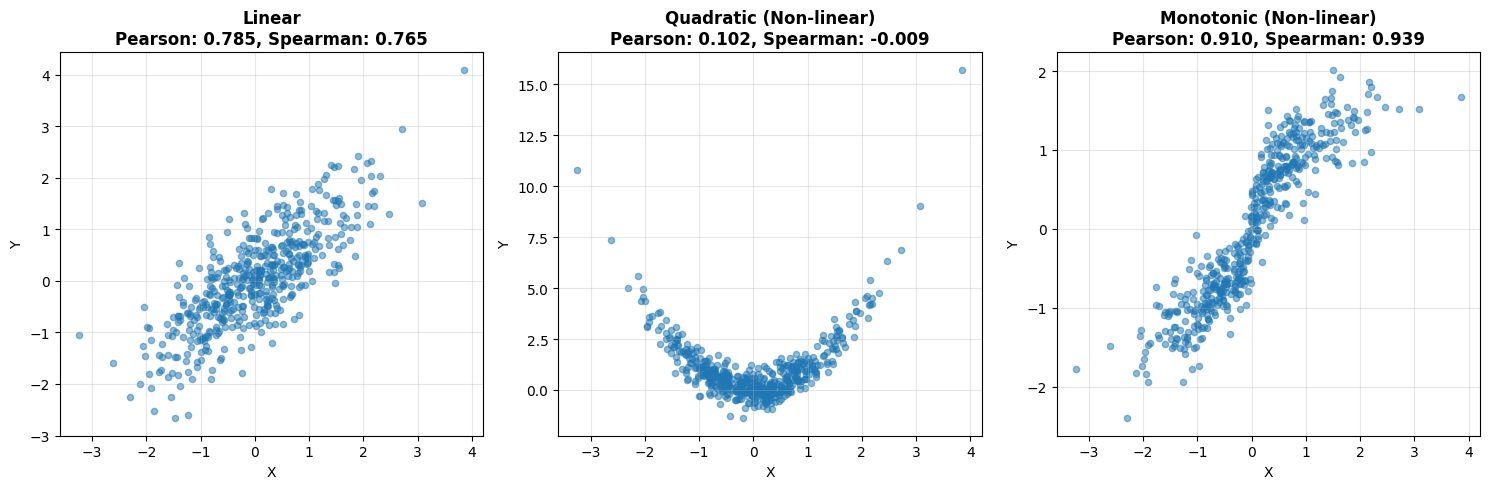


📊 KEY INSIGHTS:
• Pearson captures LINEAR relationships
• Quadratic: Clear relationship but Pearson ≈ 0!
• Spearman captures MONOTONIC relationships (works with ranks)


In [9]:
# Correlation types
print("TYPES OF CORRELATION")
print("="*60)

np.random.seed(42)
n = 500

# Linear relationship
x = np.random.normal(0, 1, n)
y_linear = 0.8 * x + np.random.normal(0, 0.6, n)

# Non-linear (quadratic)
y_nonlinear = x**2 + np.random.normal(0, 0.5, n)

# Monotonic but non-linear
y_monotonic = np.sign(x) * np.sqrt(np.abs(x)) + np.random.normal(0, 0.3, n)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Linear
axes[0].scatter(x, y_linear, alpha=0.5, s=20)
pearson = np.corrcoef(x, y_linear)[0, 1]
spearman = stats.spearmanr(x, y_linear)[0]
axes[0].set_title(f'Linear\nPearson: {pearson:.3f}, Spearman: {spearman:.3f}', fontweight='bold')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True, alpha=0.3)

# Non-linear
axes[1].scatter(x, y_nonlinear, alpha=0.5, s=20)
pearson = np.corrcoef(x, y_nonlinear)[0, 1]
spearman = stats.spearmanr(x, y_nonlinear)[0]
axes[1].set_title(f'Quadratic (Non-linear)\nPearson: {pearson:.3f}, Spearman: {spearman:.3f}', fontweight='bold')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True, alpha=0.3)

# Monotonic
axes[2].scatter(x, y_monotonic, alpha=0.5, s=20)
pearson = np.corrcoef(x, y_monotonic)[0, 1]
spearman = stats.spearmanr(x, y_monotonic)[0]
axes[2].set_title(f'Monotonic (Non-linear)\nPearson: {pearson:.3f}, Spearman: {spearman:.3f}', fontweight='bold')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 KEY INSIGHTS:")
print("• Pearson captures LINEAR relationships")
print("• Quadratic: Clear relationship but Pearson ≈ 0!")
print("• Spearman captures MONOTONIC relationships (works with ranks)")

⚠️  CORRELATION CHANGES OVER TIME


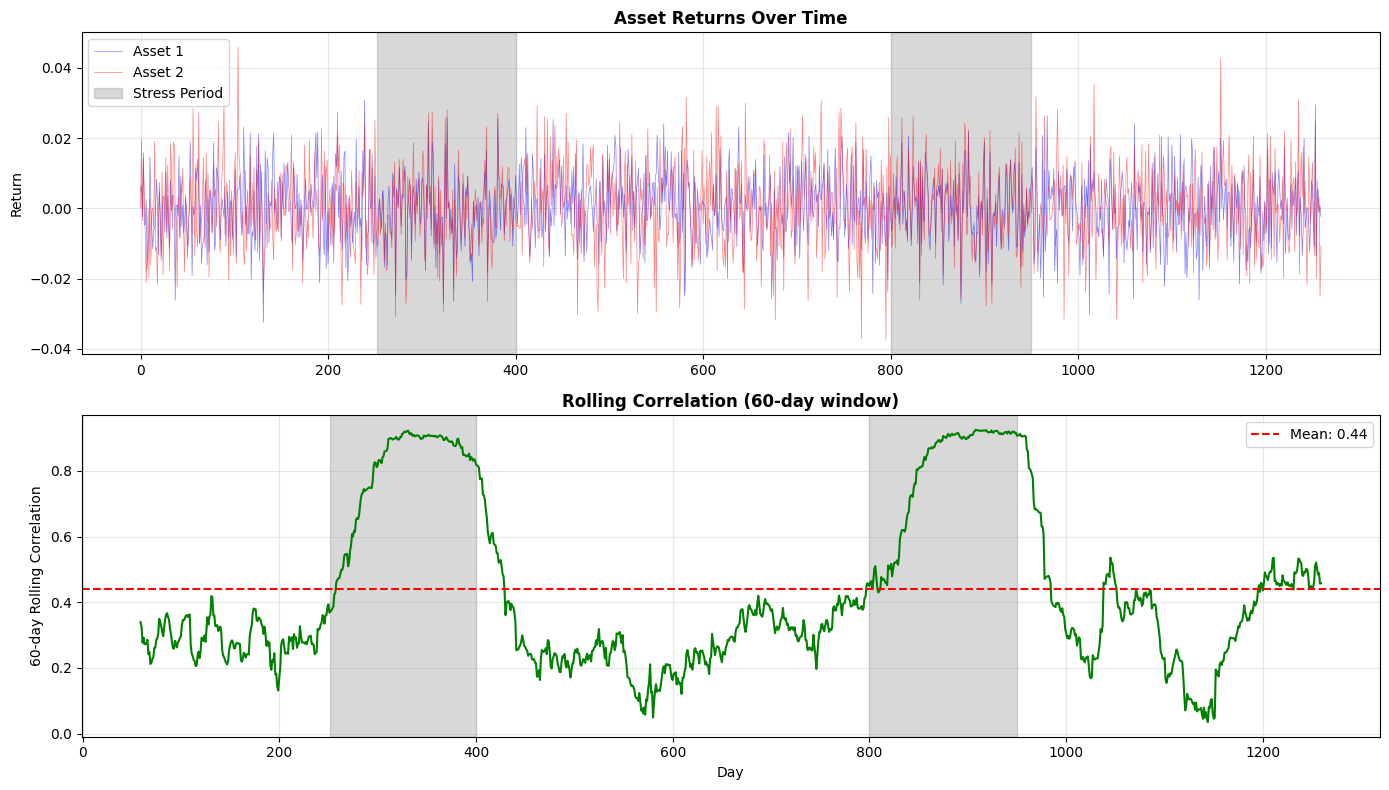


📊 OBSERVATION:
   Full-period correlation: 0.435
   But ranges from 0.035 to 0.925!

⚠️  Correlations SPIKE during market stress!
   This breaks diversification when you need it most!


In [10]:
# Correlation is not constant!
print("⚠️  CORRELATION CHANGES OVER TIME")
print("="*60)

np.random.seed(42)
n_days = 252 * 5  # 5 years

# Two correlated assets with time-varying correlation
# Correlation increases during stress periods
base_corr = 0.5

asset1 = np.zeros(n_days)
asset2 = np.zeros(n_days)

for i in range(n_days):
    # Simulate regime changes
    if 252 < i < 400 or 800 < i < 950:  # Stress periods
        corr = 0.9  # High correlation during stress
    else:
        corr = 0.3  # Normal correlation
    
    # Generate correlated returns
    z1 = np.random.normal()
    z2 = corr * z1 + np.sqrt(1 - corr**2) * np.random.normal()
    
    asset1[i] = z1 * 0.01
    asset2[i] = z2 * 0.012

# Calculate rolling correlation
window = 60
rolling_corr = pd.Series(asset1).rolling(window).corr(pd.Series(asset2))

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Returns
axes[0].plot(asset1, 'b-', alpha=0.5, label='Asset 1', linewidth=0.5)
axes[0].plot(asset2, 'r-', alpha=0.5, label='Asset 2', linewidth=0.5)
axes[0].axvspan(252, 400, alpha=0.3, color='gray', label='Stress Period')
axes[0].axvspan(800, 950, alpha=0.3, color='gray')
axes[0].set_ylabel('Return')
axes[0].set_title('Asset Returns Over Time', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Rolling correlation
axes[1].plot(rolling_corr, 'g-', linewidth=1.5)
axes[1].axhline(y=rolling_corr.mean(), color='r', linestyle='--', label=f'Mean: {rolling_corr.mean():.2f}')
axes[1].axvspan(252, 400, alpha=0.3, color='gray')
axes[1].axvspan(800, 950, alpha=0.3, color='gray')
axes[1].set_ylabel('60-day Rolling Correlation')
axes[1].set_xlabel('Day')
axes[1].set_title('Rolling Correlation (60-day window)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 OBSERVATION:")
print(f"   Full-period correlation: {np.corrcoef(asset1, asset2)[0,1]:.3f}")
print(f"   But ranges from {rolling_corr.min():.3f} to {rolling_corr.max():.3f}!")
print("\n⚠️  Correlations SPIKE during market stress!")
print("   This breaks diversification when you need it most!")

---

# Part 5: Linear Regression (OLS)

## The Model
$$Y = \alpha + \beta X + \epsilon$$

Where:
- $\alpha$ = intercept (alpha in finance!)
- $\beta$ = slope (market exposure)
- $\epsilon$ = error term (idiosyncratic risk)

## Estimation
$$\hat{\beta} = \frac{Cov(X, Y)}{Var(X)}$$
$$\hat{\alpha} = \bar{Y} - \hat{\beta}\bar{X}$$

LINEAR REGRESSION: ESTIMATING BETA
TRUE VALUES:
   Alpha (daily): 0.000200
   Beta:          1.2000

ESTIMATED VALUES (OLS):
   Alpha (daily): 0.001132
   Beta:          1.2027
   R-squared:     0.6949
   p-value (β):   1.48e-196

ANNUALIZED ALPHA: 28.54%


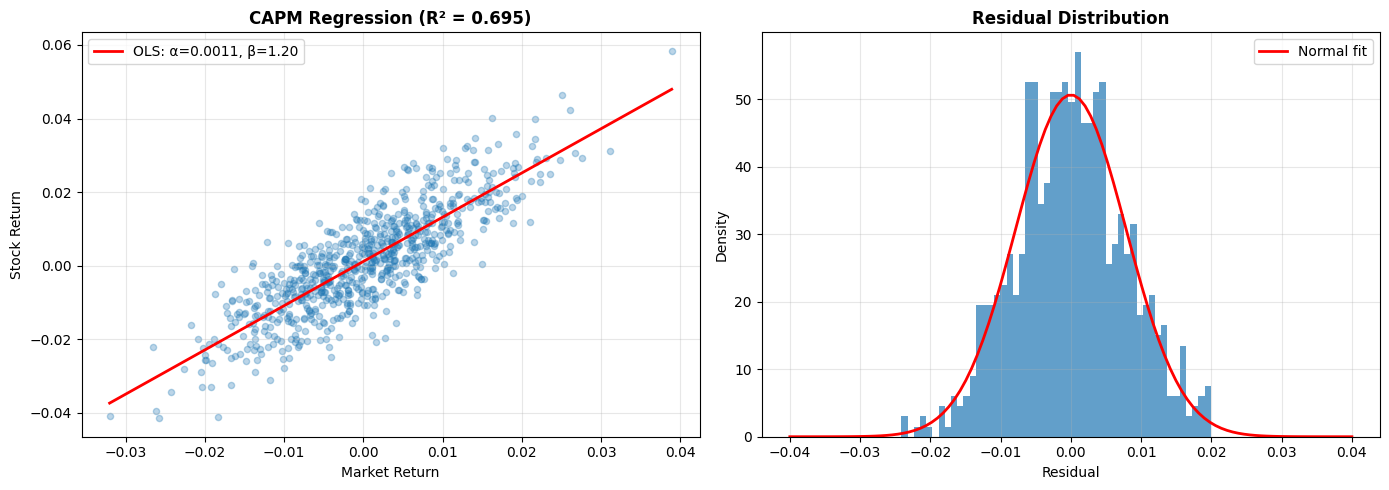

In [11]:
# Linear regression: CAPM example
print("LINEAR REGRESSION: ESTIMATING BETA")
print("="*60)

np.random.seed(42)
n_days = 252 * 3

# Market returns (benchmark)
market_returns = np.random.normal(0.0004, 0.01, n_days)

# Stock returns: r_stock = alpha + beta * r_market + epsilon
true_alpha = 0.0002  # 5% annual alpha
true_beta = 1.2      # High beta stock
epsilon = np.random.normal(0, 0.008, n_days)  # Idiosyncratic risk

stock_returns = true_alpha + true_beta * market_returns + epsilon

# OLS estimation
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(market_returns, stock_returns)

print(f"TRUE VALUES:")
print(f"   Alpha (daily): {true_alpha:.6f}")
print(f"   Beta:          {true_beta:.4f}")

print(f"\nESTIMATED VALUES (OLS):")
print(f"   Alpha (daily): {intercept:.6f}")
print(f"   Beta:          {slope:.4f}")
print(f"   R-squared:     {r_value**2:.4f}")
print(f"   p-value (β):   {p_value:.2e}")

print(f"\nANNUALIZED ALPHA: {intercept * 252:.2%}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot with regression line
axes[0].scatter(market_returns, stock_returns, alpha=0.3, s=20)
x_line = np.linspace(market_returns.min(), market_returns.max(), 100)
y_line = intercept + slope * x_line
axes[0].plot(x_line, y_line, 'r-', linewidth=2, label=f'OLS: α={intercept:.4f}, β={slope:.2f}')
axes[0].set_xlabel('Market Return')
axes[0].set_ylabel('Stock Return')
axes[0].set_title(f'CAPM Regression (R² = {r_value**2:.3f})', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residual analysis
predicted = intercept + slope * market_returns
residuals = stock_returns - predicted

axes[1].hist(residuals, bins=50, density=True, alpha=0.7)
x = np.linspace(-0.04, 0.04, 100)
axes[1].plot(x, norm.pdf(x, 0, residuals.std()), 'r-', linewidth=2, label='Normal fit')
axes[1].set_xlabel('Residual')
axes[1].set_ylabel('Density')
axes[1].set_title('Residual Distribution', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 📊 OUTPUT EXPLANATION:

- **Alpha (α)**: Excess return not explained by market (skill!)
- **Beta (β)**: Sensitivity to market moves
  - β > 1: More volatile than market
  - β < 1: Less volatile than market
  - β < 0: Moves opposite to market (hedge)
- **R²**: How much variance is explained by the model

---

# Summary: Key Formulas

## Distributions
| Distribution | When to Use |
|--------------|-------------|
| Normal | Simple models, CLT |
| Student-t | Fat tails, better for returns |
| Log-Normal | Stock prices |

## Moments
| Moment | Interpretation | Typical Values |
|--------|----------------|----------------|
| Mean | Expected return | ~0.05%/day |
| Std | Risk | ~1%/day |
| Skewness | Asymmetry | -0.5 for returns |
| Kurtosis | Tail weight | 3-10 excess |

## Hypothesis Testing
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$$

## Regression
$$r_i = \alpha + \beta r_m + \epsilon$$

In [12]:
print("""
╔══════════════════════════════════════════════════════════════════╗
║      WEEK 2 COMPLETE: STATISTICS & PROBABILITY                   ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  ✓ Part 1: Probability Distributions                            ║
║    • Normal, Student-t, Log-Normal                              ║
║    • Why returns are NOT normal                                 ║
║                                                                  ║
║  ✓ Part 2: Moments                                              ║
║    • Mean, Variance, Skewness, Kurtosis                         ║
║    • Financial interpretation                                   ║
║                                                                  ║
║  ✓ Part 3: Hypothesis Testing                                   ║
║    • t-test for strategy returns                                ║
║    • Multiple testing problem                                   ║
║    • Bonferroni correction                                      ║
║                                                                  ║
║  ✓ Part 4: Correlation                                          ║
║    • Pearson vs Spearman                                        ║
║    • Time-varying correlation                                   ║
║                                                                  ║
║  ✓ Part 5: Linear Regression                                    ║
║    • CAPM and beta estimation                                   ║
║    • Alpha interpretation                                       ║
║                                                                  ║
╚══════════════════════════════════════════════════════════════════╝

🎯 Next Week: Time Series Analysis!
""")


╔══════════════════════════════════════════════════════════════════╗
║      WEEK 2 COMPLETE: STATISTICS & PROBABILITY                   ║
╠══════════════════════════════════════════════════════════════════╣
║                                                                  ║
║  ✓ Part 1: Probability Distributions                            ║
║    • Normal, Student-t, Log-Normal                              ║
║    • Why returns are NOT normal                                 ║
║                                                                  ║
║  ✓ Part 2: Moments                                              ║
║    • Mean, Variance, Skewness, Kurtosis                         ║
║    • Financial interpretation                                   ║
║                                                                  ║
║  ✓ Part 3: Hypothesis Testing                                   ║
║    • t-test for strategy returns                                ║
║    • Multiple testing problem          